In [31]:
#!pip install tensorflow

In [2]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import datetime as dt
from datetime import timedelta
from  matplotlib import pyplot as plt
plt.style.use =('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout


In [84]:
company = 'AMZN'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,1,1)
df = web.DataReader(company, 'yahoo', start, end)

In [85]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998


In [86]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-17,3417.969971,3312.270020,3354.209961,3400.350098,4277100,3400.350098
2021-12-20,3357.489990,3312.000000,3337.000000,3341.580078,2868600,3341.580078
2021-12-21,3414.330078,3312.949951,3357.010010,3408.340088,2797800,3408.340088
2021-12-22,3441.000000,3370.010010,3385.399902,3420.739990,2751800,3420.739990
2021-12-23,3439.500000,3403.000000,3408.560059,3421.370117,1839400,3421.370117
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020
2021-12-30,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893


In [87]:
df.shape

(2517, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

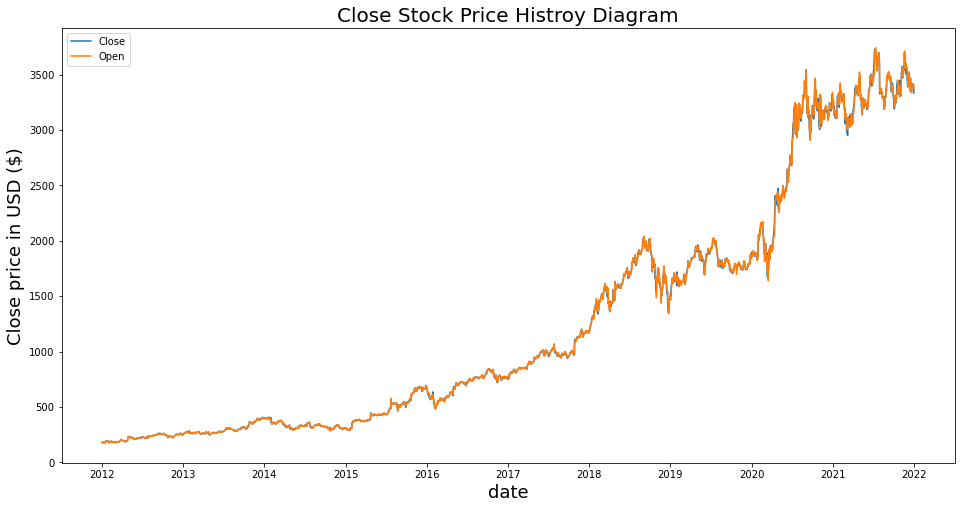

In [88]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.legend(['Close','Open'], loc='upper left')
plt.xlabel('date', fontsize=18)
plt.title('Close Stock Price Histroy Diagram', fontsize=20)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.show

In [89]:
df.shape

(2517, 6)

In [90]:
#scalling the data / converting data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [91]:
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [92]:
#spliting data into trainset and test set
prediction_days = 60
x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])
    if i<=prediction_days:
        print(x_train)
        print(y_train)

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]


In [93]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [94]:
x_train.shape, y_train.shape

((2457, 60), (2457,))

In [95]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [96]:
x_train.shape


(2457, 60, 1)

In [97]:
#building the model
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(1))

In [98]:
model.compile(optimizer='adam', loss ='mean_squared_error', metrics='accuracy')

In [100]:
model.fit(x_train, y_train ,batch_size=16 , epochs=300)

Epoch 1/300
154/154 [==============================] - 16s 103ms/step - loss: 0.0016 - accuracy: 4.0700e-04
Epoch 2/300
154/154 [==============================] - 16s 105ms/step - loss: 0.0013 - accuracy: 4.0700e-04
Epoch 3/300
154/154 [==============================] - 16s 105ms/step - loss: 0.0013 - accuracy: 4.0700e-04
Epoch 4/300
154/154 [==============================] - 16s 103ms/step - loss: 0.0015 - accuracy: 4.0700e-04
Epoch 5/300
154/154 [==============================] - 16s 103ms/step - loss: 0.0013 - accuracy: 4.0700e-04
Epoch 6/300
154/154 [==============================] - 16s 104ms/step - loss: 0.0012 - accuracy: 4.0700e-04
Epoch 7/300
154/154 [==============================] - 16s 103ms/step - loss: 0.0013 - accuracy: 4.0700e-04
Epoch 8/300
154/154 [==============================] - 16s 103ms/step - loss: 0.0014 - accuracy: 4.0700e-04
Epoch 9/300
154/154 [==============================] - 16s 105ms/step - loss: 0.0013 - accuracy: 4.0700e-04
Epoch 10/300
154/154 [======

Epoch 75/300
154/154 [==============================] - 15s 99ms/step - loss: 8.9287e-04 - accuracy: 4.0700e-04
Epoch 76/300
154/154 [==============================] - 1531s 10s/step - loss: 9.2198e-04 - accuracy: 4.0700e-04
Epoch 77/300
154/154 [==============================] - 20s 131ms/step - loss: 7.6489e-04 - accuracy: 4.0700e-04
Epoch 78/300
154/154 [==============================] - 17s 109ms/step - loss: 9.1842e-04 - accuracy: 4.0700e-04
Epoch 79/300
154/154 [==============================] - 17s 109ms/step - loss: 7.3402e-04 - accuracy: 4.0700e-04
Epoch 80/300
154/154 [==============================] - 16s 103ms/step - loss: 7.9433e-04 - accuracy: 4.0700e-04
Epoch 81/300
154/154 [==============================] - 17s 111ms/step - loss: 8.3921e-04 - accuracy: 4.0700e-04
Epoch 82/300
154/154 [==============================] - 17s 109ms/step - loss: 7.7918e-04 - accuracy: 4.0700e-04
Epoch 83/300
154/154 [==============================] - 17s 111ms/step - loss: 8.6480e-04 - accur

154/154 [==============================] - 22s 144ms/step - loss: 7.7244e-04 - accuracy: 4.0700e-04
Epoch 148/300
154/154 [==============================] - 22s 141ms/step - loss: 7.0355e-04 - accuracy: 4.0700e-04
Epoch 149/300
154/154 [==============================] - 22s 145ms/step - loss: 6.9721e-04 - accuracy: 4.0700e-04
Epoch 150/300
154/154 [==============================] - 22s 141ms/step - loss: 8.8189e-04 - accuracy: 4.0700e-04
Epoch 151/300
154/154 [==============================] - 23s 150ms/step - loss: 6.9639e-04 - accuracy: 4.0700e-04
Epoch 152/300
154/154 [==============================] - 25s 166ms/step - loss: 7.6363e-04 - accuracy: 4.0700e-04
Epoch 153/300
154/154 [==============================] - 23s 151ms/step - loss: 7.0539e-04 - accuracy: 4.0700e-04
Epoch 154/300
154/154 [==============================] - 23s 149ms/step - loss: 7.9197e-04 - accuracy: 4.0700e-04
Epoch 155/300
154/154 [==============================] - 22s 146ms/step - loss: 7.7680e-04 - accuracy:

154/154 [==============================] - 17s 110ms/step - loss: 7.5377e-04 - accuracy: 4.0700e-04
Epoch 220/300
154/154 [==============================] - 17s 108ms/step - loss: 7.1464e-04 - accuracy: 4.0700e-04
Epoch 221/300
154/154 [==============================] - 18s 116ms/step - loss: 7.6917e-04 - accuracy: 4.0700e-04
Epoch 222/300
154/154 [==============================] - 2628s 17s/step - loss: 6.7420e-04 - accuracy: 4.0700e-04
Epoch 223/300
154/154 [==============================] - 20s 127ms/step - loss: 7.0070e-04 - accuracy: 4.0700e-04
Epoch 224/300
154/154 [==============================] - 18s 116ms/step - loss: 6.9129e-04 - accuracy: 4.0700e-04
Epoch 225/300
154/154 [==============================] - 18s 116ms/step - loss: 7.3346e-04 - accuracy: 4.0700e-04
Epoch 226/300
154/154 [==============================] - 18s 115ms/step - loss: 7.1384e-04 - accuracy: 4.0700e-04
Epoch 227/300
154/154 [==============================] - 18s 117ms/step - loss: 7.1457e-04 - accuracy:

154/154 [==============================] - 19s 125ms/step - loss: 6.4817e-04 - accuracy: 4.0700e-04
Epoch 292/300
154/154 [==============================] - 18s 117ms/step - loss: 6.4681e-04 - accuracy: 4.0700e-04
Epoch 293/300
154/154 [==============================] - 16s 104ms/step - loss: 6.6899e-04 - accuracy: 4.0700e-04
Epoch 294/300
154/154 [==============================] - 16s 106ms/step - loss: 6.6369e-04 - accuracy: 4.0700e-04
Epoch 295/300
154/154 [==============================] - 16s 102ms/step - loss: 6.7010e-04 - accuracy: 4.0700e-04
Epoch 296/300
154/154 [==============================] - 15s 100ms/step - loss: 7.0486e-04 - accuracy: 4.0700e-04
Epoch 297/300
154/154 [==============================] - 16s 102ms/step - loss: 6.2612e-04 - accuracy: 4.0700e-04
Epoch 298/300
154/154 [==============================] - 16s 101ms/step - loss: 6.4532e-04 - accuracy: 4.0700e-04
Epoch 299/300
154/154 [==============================] - 16s 102ms/step - loss: 6.5131e-04 - accuracy:

In [150]:
# creating test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

actual_price = test_data['Close'].values
total_dataset = pd.concat((df['Close'],test_data['Close']), axis=0)


In [153]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [103]:
x_test=[]

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i,0])


x_test = np.array(x_test)
x_test = np.reshape(x_test,( x_test.shape[0], x_test.shape[1],1))


In [104]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

<function matplotlib.pyplot.show(close=None, block=None)>

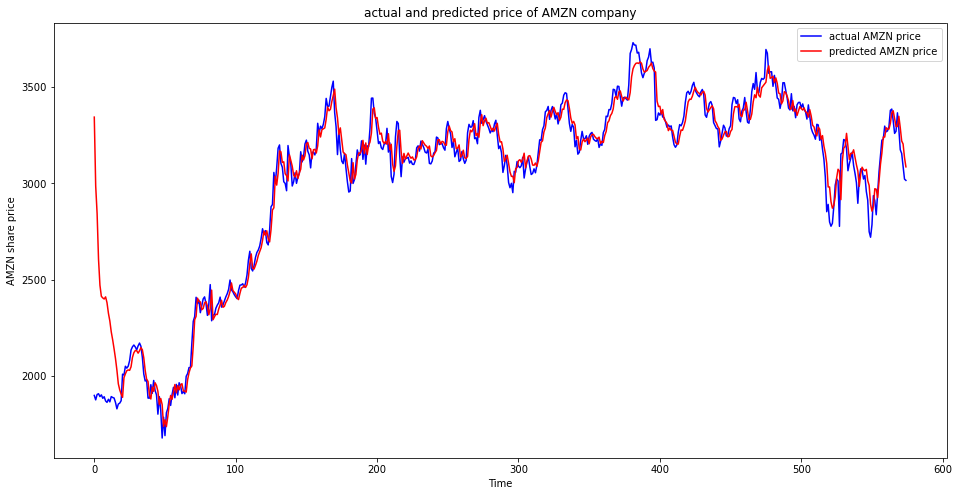

In [112]:
plt.figure(figsize=(16,8))
plt.plot(actual_price, color='blue', label=f"actual {company} price")
plt.plot(predicted_price, color='red', label=f"predicted {company} price")
plt.title(f"actual and predicted price of {company} company" )
plt.xlabel('Time')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show

# predict the next day

In [154]:
real_data =[model_inputs[len(model_inputs) + 2 - prediction_days:len(model_inputs +2), 0 ]]

real_data = np.array(real_data)
real_data = np.reshape(real_data,( real_data.shape[0], real_data.shape[1], 1))

real_data.shape

(1, 58, 1)

In [156]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)



yesterday_data = actual_price[-1]
yesterday_date = dt.datetime.now() - timedelta(days=1)

print(f"Yesterdays Price: {yesterday_data}", yesterday_date)
print(f"Prediction Price: {prediction}", dt.datetime.now())

Yesterdays Price: 3015.75 2022-04-12 11:55:53.188899
Prediction Price: [[3067.8228]] 2022-04-13 11:55:53.209319


In [118]:
'''appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)
new_df = appel_quoto.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
'''

"appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)\nnew_df = appel_quoto.filter(['Close'])\nlast_60_days = new_df[-60:].values\nlast_60_days_scaled = scaler.transform(last_60_days)\nX_test=[]\nX_test.append(last_60_days_scaled)\nX_test = np.array(X_test)\nX_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))\npred_price = model.predict(X_test)\npred_price = scaler.inverse_transform(pred_price)\nprint(pred_price)\n"

In [119]:
#yesterday = dt.datetime.now() - timedelta(days=1)
#apple_quat2 = web.DataReader('AAPL', 'yahoo', yesterday, test_end)
#yesterday = new_df[-1:]
#print(apple_quat2['Close'])

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50)               

In [69]:
company = 'AMZN'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,1,1)
data = web.DataReader(company, 'yahoo', start, end)

In [70]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998


In [71]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [72]:
X= data.drop(['Close'],axis=1)

In [73]:
Y= data['Close']

In [74]:
print(X)
print(Y)

                   High          Low         Open   Volume    Adj Close
Date                                                                   
2012-01-03   179.479996   175.550003   175.889999  5110800   179.029999
2012-01-04   180.500000   176.070007   179.210007  4205200   177.509995
2012-01-05   178.250000   174.050003   175.940002  3809100   177.610001
2012-01-06   184.649994   177.500000   178.070007  7008400   182.610001
2012-01-09   184.369995   177.000000   182.759995  5056900   178.559998
...                 ...          ...          ...      ...          ...
2021-12-27  3458.860107  3384.310059  3420.739990  2934400  3393.389893
2021-12-28  3443.520020  3382.709961  3403.649902  2731900  3413.219971
2021-12-29  3424.239990  3372.010010  3416.800049  1787700  3384.020020
2021-12-30  3417.760010  3370.479980  3394.000000  1879200  3372.889893
2021-12-31  3387.000000  3331.169922  3379.120117  2391500  3334.340088

[2517 rows x 5 columns]
Date
2012-01-03     179.029999
2012-01-

In [75]:
#from sklearn.preprocessing import StandardScaler
#dt_scarler = StandardScaler()

In [76]:
#X = dt_scarler.fit_transform(X)

In [77]:
#Y = dt_scarler.fit_transform(Y).values.reshape(-1,1)

In [78]:
print(X)

                   High          Low         Open   Volume    Adj Close
Date                                                                   
2012-01-03   179.479996   175.550003   175.889999  5110800   179.029999
2012-01-04   180.500000   176.070007   179.210007  4205200   177.509995
2012-01-05   178.250000   174.050003   175.940002  3809100   177.610001
2012-01-06   184.649994   177.500000   178.070007  7008400   182.610001
2012-01-09   184.369995   177.000000   182.759995  5056900   178.559998
...                 ...          ...          ...      ...          ...
2021-12-27  3458.860107  3384.310059  3420.739990  2934400  3393.389893
2021-12-28  3443.520020  3382.709961  3403.649902  2731900  3413.219971
2021-12-29  3424.239990  3372.010010  3416.800049  1787700  3384.020020
2021-12-30  3417.760010  3370.479980  3394.000000  1879200  3372.889893
2021-12-31  3387.000000  3331.169922  3379.120117  2391500  3334.340088

[2517 rows x 5 columns]


In [79]:
Y

Date
2012-01-03     179.029999
2012-01-04     177.509995
2012-01-05     177.610001
2012-01-06     182.610001
2012-01-09     178.559998
                 ...     
2021-12-27    3393.389893
2021-12-28    3413.219971
2021-12-29    3384.020020
2021-12-30    3372.889893
2021-12-31    3334.340088
Name: Close, Length: 2517, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=2, test_size=0.2 )

In [ ]:
from sklearn
model = 